In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from enum import Enum
import itertools
from datetime import datetime

dataset_dir = "../DataSet_CSVs/"

# shared CSV Link: https://docs.google.com/spreadsheets/d/1R4jSAZRnY51854B2PE-Y8L8G4KaLXcE4yR4zDtp-1Tg/edit?usp=sharing

In [2]:
# Import the dataset
bike_df = pd.read_csv(dataset_dir + "202112-capitalbikeshare-tripdata.csv")
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D23C21951F265D19,classic_bike,2021-12-12 14:25:41,2021-12-12 14:31:04,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,32032.0,39.083673,-77.149162,39.076331,-77.141378,member
1,4E2218DC5EF71C81,electric_bike,2021-12-30 16:27:27,2021-12-30 17:02:16,5th & Kennedy St NW,31403.0,6th & K St NE,31645.0,38.956651,-77.019741,38.902932,-76.998405,casual
2,A19607CDC98C051C,classic_bike,2021-12-27 11:14:18,2021-12-27 11:38:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
3,8B9BB60DB257BA57,classic_bike,2021-12-27 11:12:54,2021-12-27 11:37:49,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
4,4EAB499C31027AB4,classic_bike,2021-12-17 09:06:54,2021-12-17 09:26:05,5th & Kennedy St NW,31403.0,John McCormack Rd NE,31528.0,38.956556,-77.019814,38.938889,-76.997226,casual


In [3]:
# Get all the column headers out of the datasheet to a csv
category_list = ["rideable_type", "start_station_name", "end_station_name", "member_casual"]
col_info_list = [[str(col_new), str(bike_df[col_new].dtype), str(bike_df[col_new].isna().sum()), str(len(bike_df[col_new].unique())), str(len(bike_df[col_new].unique()) == len(bike_df[col_new]))] for col_new in bike_df.columns]
with open(dataset_dir + "columns.csv", "w") as colfile:
    [colfile.write(",".join([col, col_dtype, count_sum, count_unique])+"\n") for col, col_dtype, count_sum, count_unique, count_is_unique in col_info_list]

In [4]:
# Print out the head of the dataset
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D23C21951F265D19,classic_bike,2021-12-12 14:25:41,2021-12-12 14:31:04,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,32032.0,39.083673,-77.149162,39.076331,-77.141378,member
1,4E2218DC5EF71C81,electric_bike,2021-12-30 16:27:27,2021-12-30 17:02:16,5th & Kennedy St NW,31403.0,6th & K St NE,31645.0,38.956651,-77.019741,38.902932,-76.998405,casual
2,A19607CDC98C051C,classic_bike,2021-12-27 11:14:18,2021-12-27 11:38:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
3,8B9BB60DB257BA57,classic_bike,2021-12-27 11:12:54,2021-12-27 11:37:49,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
4,4EAB499C31027AB4,classic_bike,2021-12-17 09:06:54,2021-12-17 09:26:05,5th & Kennedy St NW,31403.0,John McCormack Rd NE,31528.0,38.956556,-77.019814,38.938889,-76.997226,casual


In [5]:
# Print out the dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190847 entries, 0 to 190846
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             190847 non-null  object 
 1   rideable_type       190847 non-null  object 
 2   started_at          190847 non-null  object 
 3   ended_at            190847 non-null  object 
 4   start_station_name  180747 non-null  object 
 5   start_station_id    180747 non-null  float64
 6   end_station_name    179344 non-null  object 
 7   end_station_id      179344 non-null  float64
 8   start_lat           190847 non-null  float64
 9   start_lng           190847 non-null  float64
 10  end_lat             190586 non-null  float64
 11  end_lng             190586 non-null  float64
 12  member_casual       190847 non-null  object 
dtypes: float64(6), object(7)
memory usage: 18.9+ MB


In [6]:
# Describe the df
bike_df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,180747.000000,179344.000000,190847.000000,190847.000000,190586.000000,190586.000000
mean,31367.365196,31367.679928,38.904063,-77.030403,38.903029,-77.030211
std,247.959906,246.213269,0.024920,0.031298,0.024511,0.030980
min,31000.000000,31000.000000,38.780000,-77.368416,38.780000,-77.368416
25%,31212.000000,31214.000000,38.892453,-77.043600,38.892275,-77.043680
50%,31278.000000,31276.000000,38.903658,-77.030000,38.902674,-77.030000
75%,31607.000000,31608.000000,38.915000,-77.012365,38.912648,-77.012365
max,32609.000000,32901.000000,39.125887,-76.825535,39.125828,-76.825535


In [7]:
# Drop out the Ride ID
bike_df.drop(["ride_id", "end_station_id"], axis=1, inplace=True)

In [8]:
# Copy off the original df for any future use with the Null values.
copy_bike_df = bike_df.copy()

In [9]:
# Drop the null columns for initial analyses
bike_df.dropna(axis=0, inplace=True)

In [10]:
# Verify the new structure of the data.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174372 entries, 0 to 190846
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       174372 non-null  object 
 1   started_at          174372 non-null  object 
 2   ended_at            174372 non-null  object 
 3   start_station_name  174372 non-null  object 
 4   start_station_id    174372 non-null  float64
 5   end_station_name    174372 non-null  object 
 6   start_lat           174372 non-null  float64
 7   start_lng           174372 non-null  float64
 8   end_lat             174372 non-null  float64
 9   end_lng             174372 non-null  float64
 10  member_casual       174372 non-null  object 
dtypes: float64(5), object(6)
memory usage: 16.0+ MB


In [11]:
# The elapsed time on the bike
bike_df["started_at"] = pd.to_datetime(bike_df["started_at"])
bike_df["ended_at"] = pd.to_datetime(bike_df["ended_at"])
bike_df["elapsed_time"] = [((end) - (start)) for start, end in list(zip(bike_df["started_at"], bike_df["ended_at"]))]

In [12]:
# Parse out the date time stamps into separate columns
class dateenum(str, Enum):
    year="year"
    month="month"
    week="week"
    day="day"
    hour="hour"
    day_of_week="dow"
    
# Storage lists to parse out to columns

# Function to archive all the information out of the column
def datetime_lambda_func(input_dt, datetime_col_list):
    datetime_col_list[dateenum.year].append(input_dt.year)
    datetime_col_list[dateenum.month].append(input_dt.month)
    datetime_col_list[dateenum.day].append(input_dt.day)
    datetime_col_list[dateenum.hour].append(input_dt.hour)
    datetime_col_list[dateenum.day_of_week].append(input_dt.day%7)
    datetime_col_list[dateenum.week].append(input_dt.day//7)
    return datetime(input_dt.year, input_dt.month, input_dt.day, input_dt.hour)

# Find the columns with the times
time_list = ["started_at", "ended_at"]

for col in time_list:
    datetime_col_list = {dateenum.year:[], dateenum.month:[], dateenum.week:[], dateenum.day:[], dateenum.hour:[], dateenum.day_of_week:[]}
    bike_df[col] = bike_df[col].apply(lambda l: datetime_lambda_func(l, datetime_col_list))
    for value in [dateenum.year, dateenum.month, dateenum.day, dateenum.hour, dateenum.day_of_week, dateenum.week]:
        bike_df[f"{col}_{value}"] = datetime_col_list[value]
        category_list.append(f"{col}_{value}")
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,start_lat,start_lng,end_lat,end_lng,...,started_at_day,started_at_hour,started_at_dow,started_at_week,ended_at_year,ended_at_month,ended_at_day,ended_at_hour,ended_at_dow,ended_at_week
0,classic_bike,2021-12-12 14:00:00,2021-12-12 14:00:00,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,39.083673,-77.149162,39.076331,-77.141378,...,12,14,5,1,2021,12,12,14,5,1
1,electric_bike,2021-12-30 16:00:00,2021-12-30 17:00:00,5th & Kennedy St NW,31403.0,6th & K St NE,38.956651,-77.019741,38.902932,-76.998405,...,30,16,2,4,2021,12,30,17,2,4
2,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,39.083673,-77.149162,39.062190,-77.129235,...,27,11,6,3,2021,12,27,11,6,3
3,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,39.083673,-77.149162,39.062190,-77.129235,...,27,11,6,3,2021,12,27,11,6,3
4,classic_bike,2021-12-17 09:00:00,2021-12-17 09:00:00,5th & Kennedy St NW,31403.0,John McCormack Rd NE,38.956556,-77.019814,38.938889,-76.997226,...,17,9,3,2,2021,12,17,9,3,2


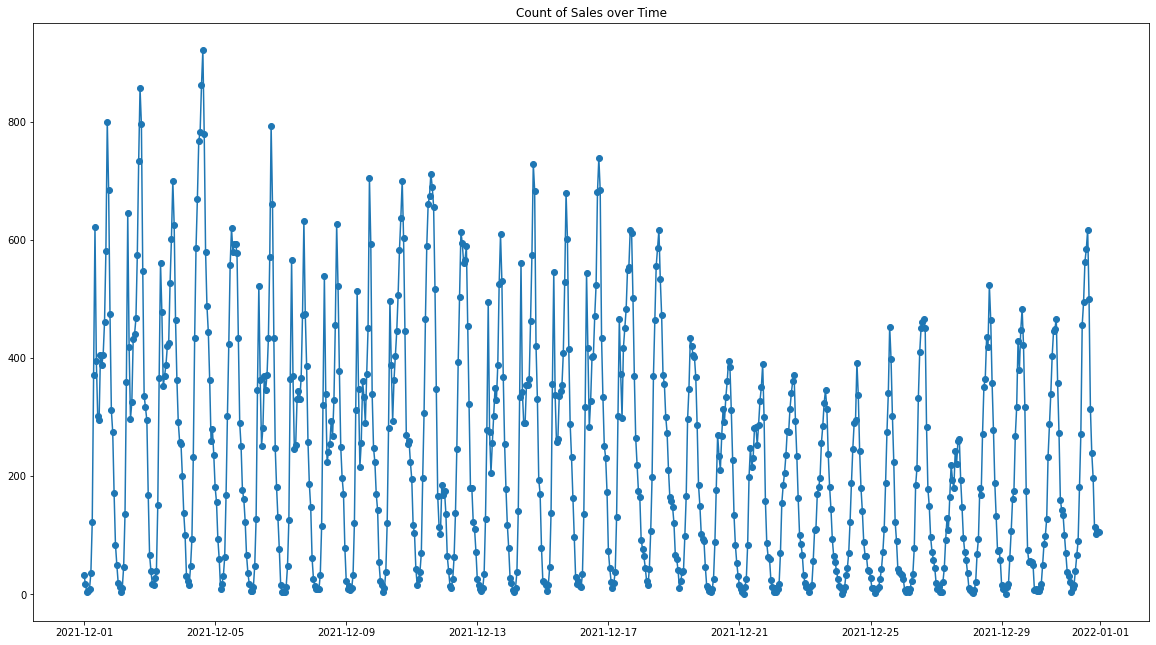

In [13]:
# Plot out the data by datetime
time_bike_df = bike_df.groupby(["started_at"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(time_bike_df.index, time_bike_df.values, linestyle="solid")
plt.title("Count of Sales over Time")
plt.show()

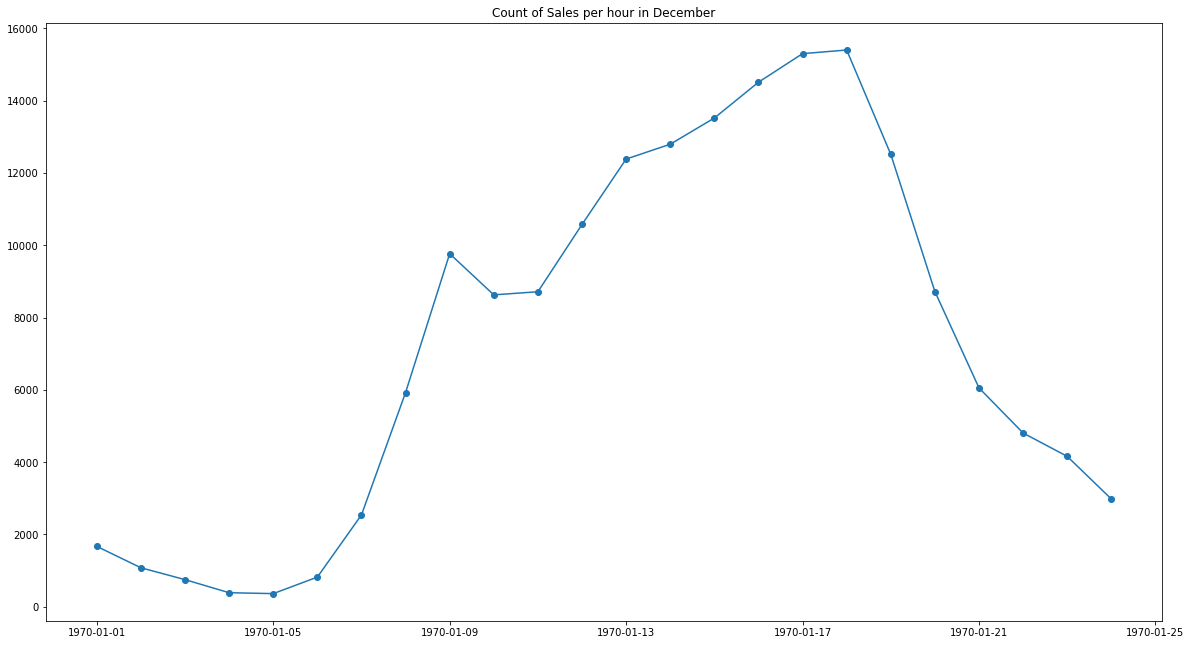

In [14]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_hour"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per hour in December")
plt.show()

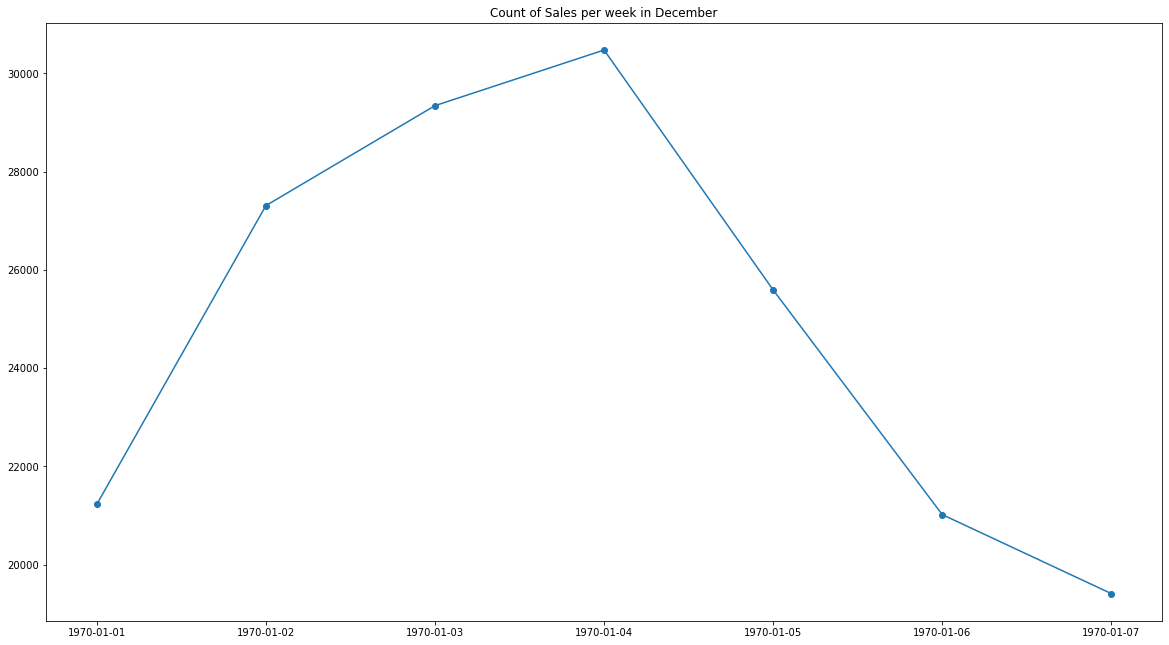

In [15]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_dow"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per week in December")
plt.show()

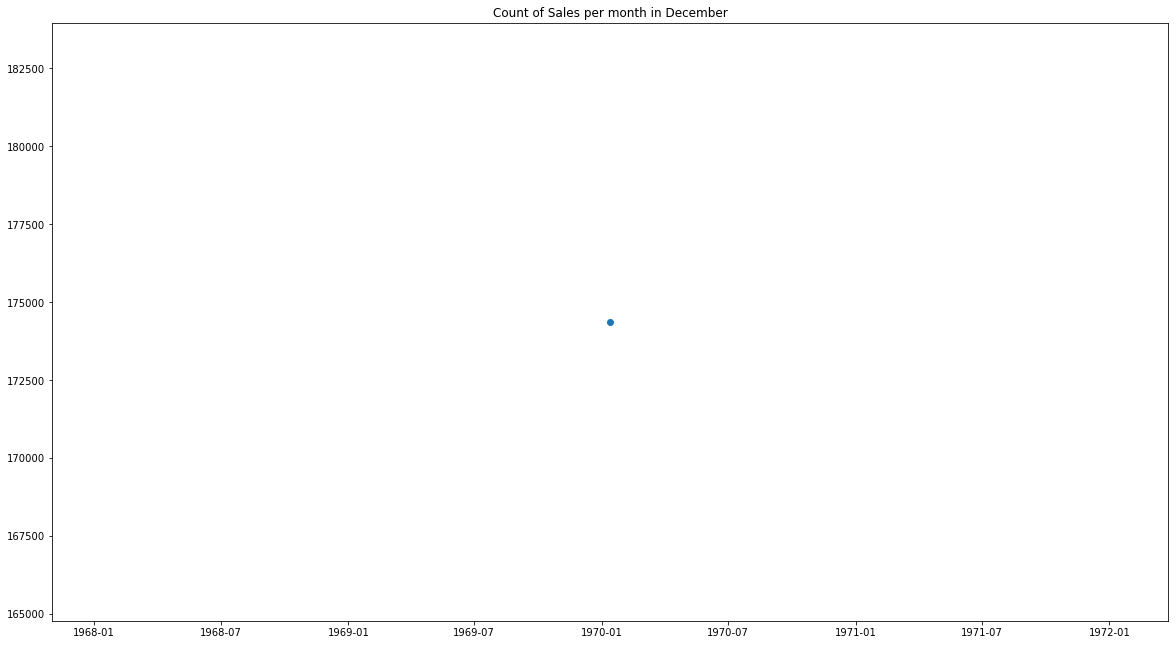

In [16]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_month"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per month in December")
plt.show()

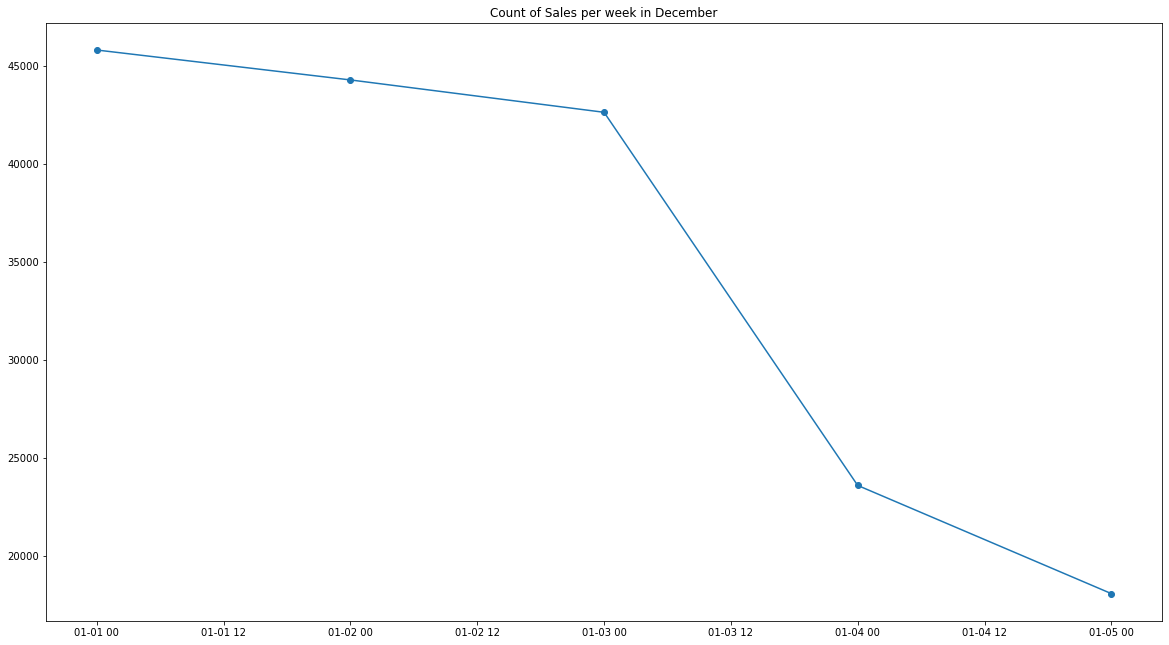

In [17]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_week"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per week in December")
plt.show()

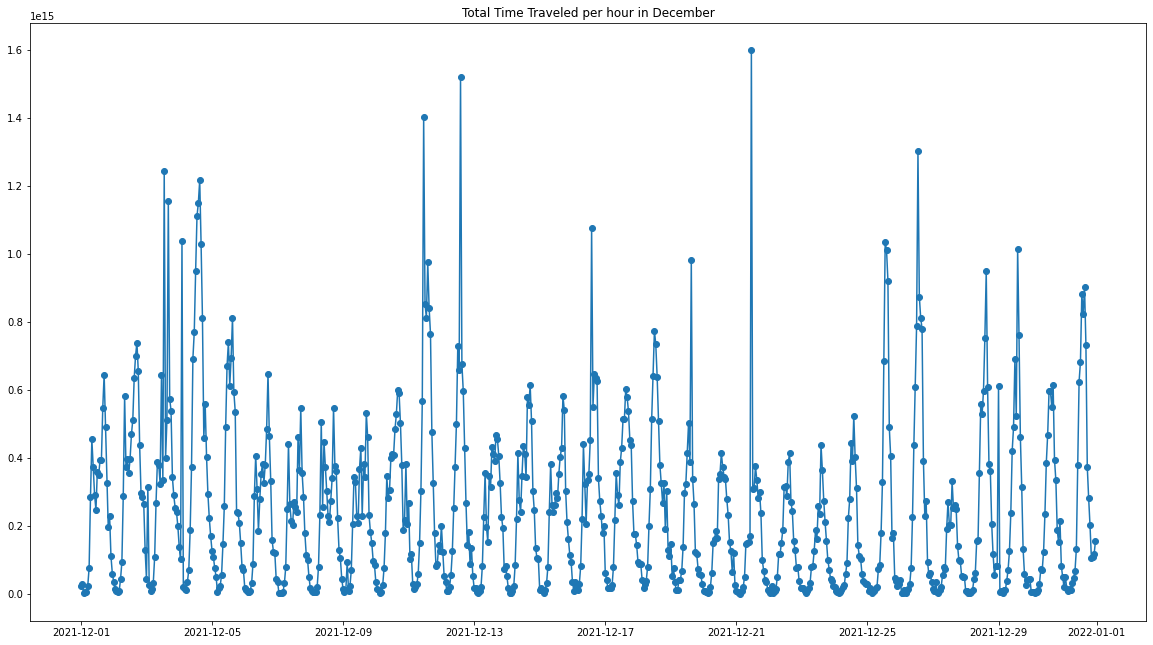

In [18]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at"])["elapsed_time"].sum()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

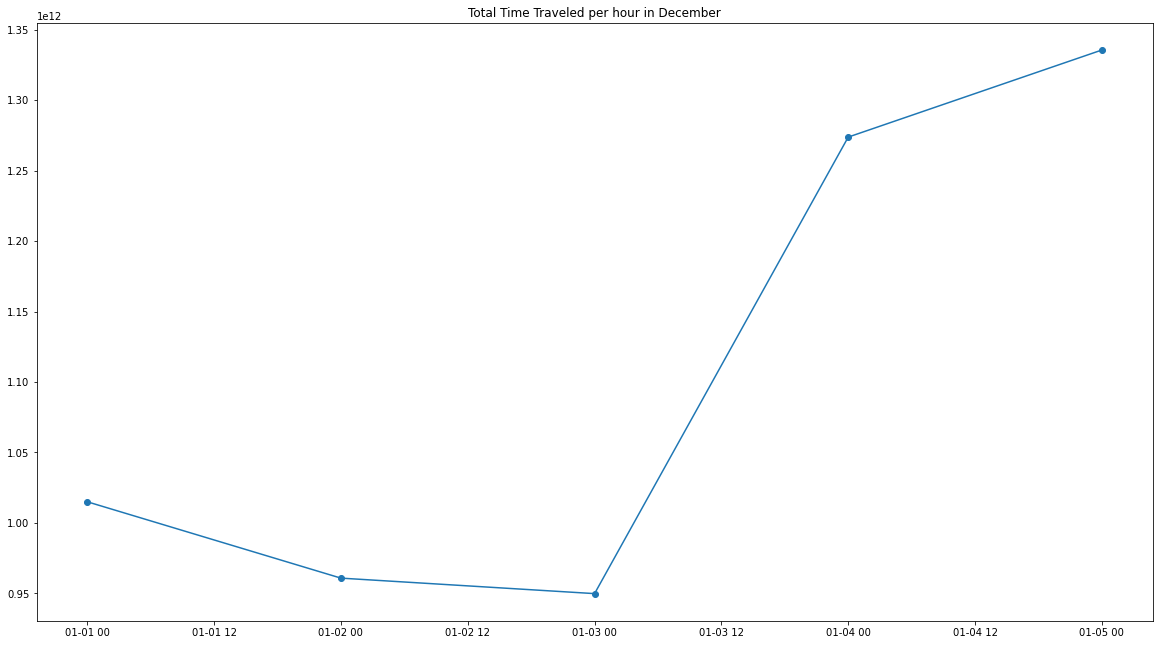

In [19]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].mean()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

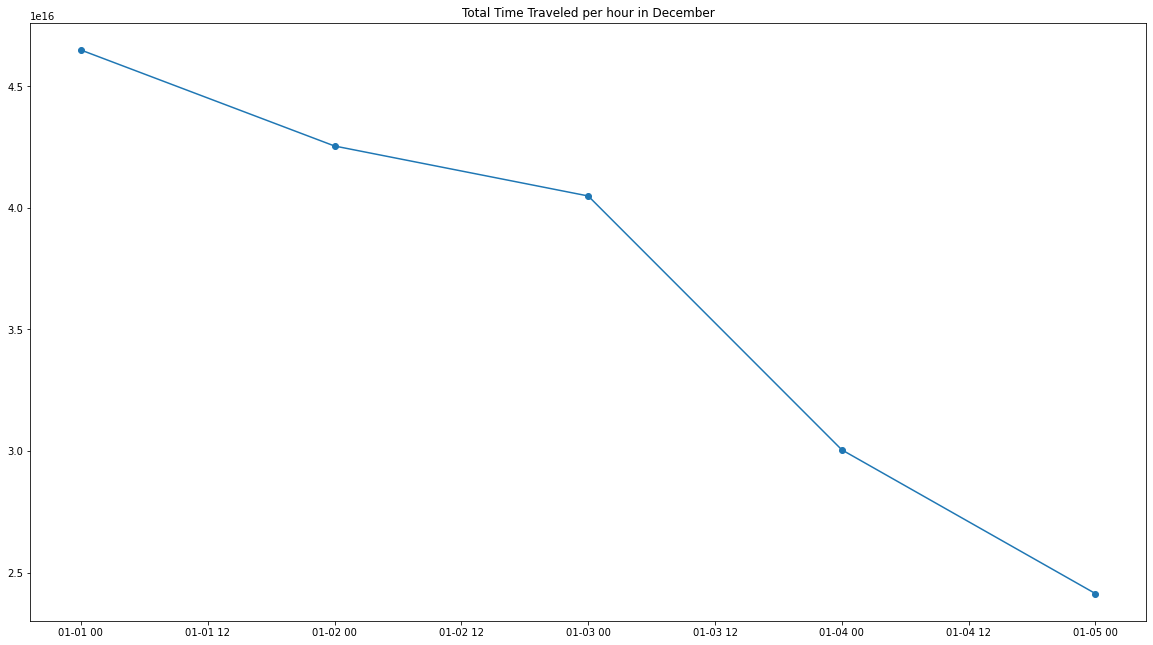

In [20]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].sum()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

In [21]:
# Bin off the latitude and longitude
location_list = ["start_lat", "start_lng", "end_lat", "end_lng"]
for perm in itertools.product([2, 5, 10],location_list):
        bike_df[f"{perm[1]}_{perm[0]}"] = bike_df[perm[1]].apply(lambda l: l - (l%perm[0]))
bike_df.drop(location_list, axis=1, inplace=True)
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,elapsed_time,started_at_year,started_at_month,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,classic_bike,2021-12-12 14:00:00,2021-12-12 14:00:00,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,member,0 days 00:05:23,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,electric_bike,2021-12-30 16:00:00,2021-12-30 17:00:00,5th & Kennedy St NW,31403.0,6th & K St NE,casual,0 days 00:34:49,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,casual,0 days 00:23:42,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,casual,0 days 00:24:55,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,classic_bike,2021-12-17 09:00:00,2021-12-17 09:00:00,5th & Kennedy St NW,31403.0,John McCormack Rd NE,casual,0 days 00:19:11,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [22]:
# Convert the objects to categorical types
bike_df[category_list] = bike_df[category_list].astype("category")
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174372 entries, 0 to 190846
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   rideable_type       174372 non-null  category       
 1   started_at          174372 non-null  datetime64[ns] 
 2   ended_at            174372 non-null  datetime64[ns] 
 3   start_station_name  174372 non-null  category       
 4   start_station_id    174372 non-null  float64        
 5   end_station_name    174372 non-null  category       
 6   member_casual       174372 non-null  category       
 7   elapsed_time        174372 non-null  timedelta64[ns]
 8   started_at_year     174372 non-null  category       
 9   started_at_month    174372 non-null  category       
 10  started_at_day      174372 non-null  category       
 11  started_at_hour     174372 non-null  category       
 12  started_at_dow      174372 non-null  category       
 13  started_at_wee

In [23]:
# Get the one hot encoded dummy parameters
#bike_df = pd.get_dummies(data=bike_df, columns=category_list, drop_first=True)
#bike_df.head()

In [24]:
# break out the elapsed time
bike_df["elapsed_time"] = bike_df["elapsed_time"].apply(lambda l: l.seconds/60)
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,elapsed_time,started_at_year,started_at_month,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,classic_bike,2021-12-12 14:00:00,2021-12-12 14:00:00,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,member,5.383333,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,electric_bike,2021-12-30 16:00:00,2021-12-30 17:00:00,5th & Kennedy St NW,31403.0,6th & K St NE,casual,34.816667,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,casual,23.700000,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,casual,24.916667,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,classic_bike,2021-12-17 09:00:00,2021-12-17 09:00:00,5th & Kennedy St NW,31403.0,John McCormack Rd NE,casual,19.183333,2021,12,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [25]:
# Group the data to get the labels
cat_list = ["start_station_name", "started_at_year", "started_at_month", "started_at_day", "started_at_hour"]
num_list = ["start_station_name"]

In [26]:
# Aggregate the data to get ready for predicting by the hour
hour_df = bike_df.groupby([f"started_at_{val}" for val in ["year", "month", "day", "hour"]]).count().reset_index()
hour_df = hour_df.reset_index()
hour_df

,index,started_at_year,started_at_month,started_at_day,started_at_hour,rideable_type,started_at,ended_at,start_station_name,start_station_id,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,0,2021,12,1,0,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
1,1,2021,12,1,1,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
2,2,2021,12,1,2,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,2021,12,1,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,4,2021,12,1,4,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,739,2021,12,31,19,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197
740,740,2021,12,31,20,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
741,741,2021,12,31,21,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
742,742,2021,12,31,22,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107


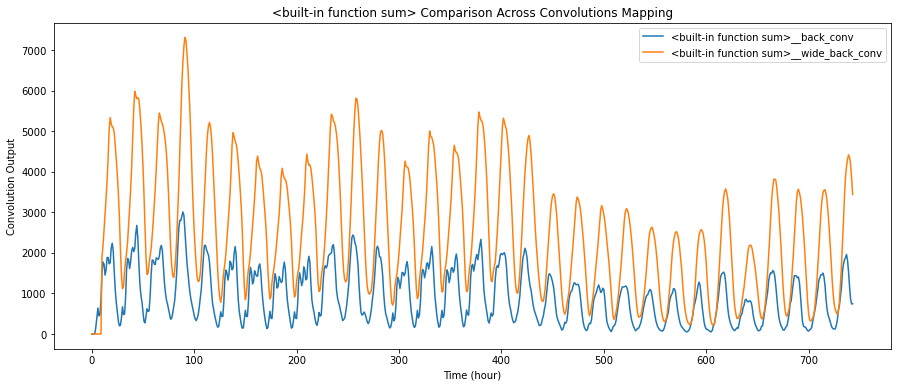

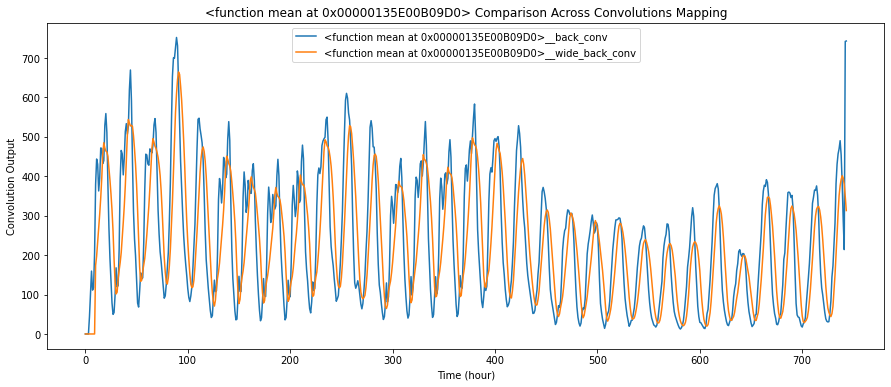

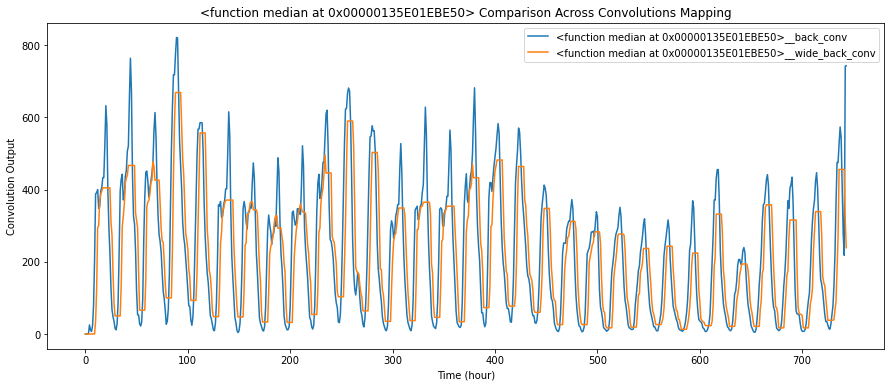

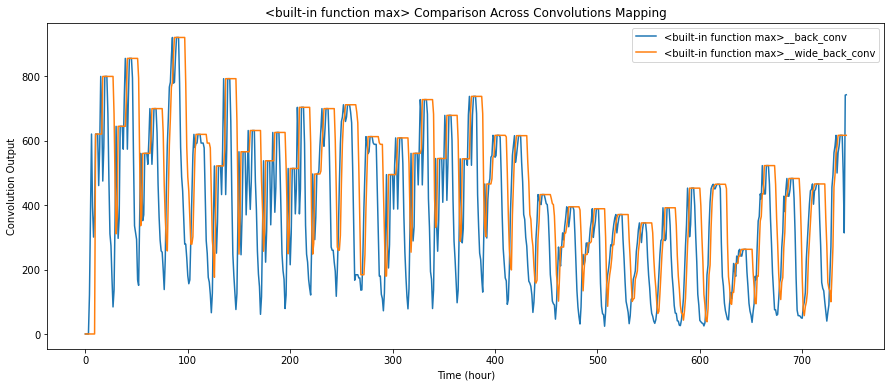

In [27]:
# Create a convolution for the elapsed time stuff
# Plot out the data by datetime
def create_convolution_list(input_data, conv_mapping, conv_mapping_function):
    min_conv = min(conv_mapping)
    max_conv = max(conv_mapping)
    output_list = [0 for x in range(-min_conv)]
    for item_index in range(-min_conv, len(input_data)-max_conv):
        output_list.append(conv_mapping_function([input_data[item_index+x] for x in conv_mapping]))
    [output_list.append(x) for x in range(len(input_data)-max_conv, len(input_data))]
    return output_list

# Run a combination of graphs
def run_convolutions(input_data, new_col_names, mapping_lists, function_list):
    for function in function_list:
        plt.figure(figsize=(15,6))
        for x in range(len(mapping_lists)):
            col_name = f"{str(function)}__{new_col_names[x]}"
            hour_df[col_name] = create_convolution_list(input_data, mapping_lists[x], function)
            plt.plot(hour_df[col_name], label=col_name)
        plt.title(f"{str(function)} Comparison Across Convolutions Mapping")
        plt.xlabel("Time (hour)")
        plt.ylabel("Convolution Output")
        plt.legend()
        plt.show()

# Run the convolutions on the data to add them to the dataset
back_conv_mapping = [-4, -3, -2, 2]
new_conv_mapping = [-2, -1, 0, 1, 2]
forward_conv_mapping = [-1, 1, 3, 5]
wide_conv_mapping = range(-5, 6)
wide_back_conv_mapping = range(-10, 1)
wide_front_conv_mapping = range(0, 11)

func_list = [sum, np.mean, np.median, max]
run_convolutions(hour_df["rideable_type"], ["back_conv", "wide_back_conv"], [back_conv_mapping, wide_back_conv_mapping], func_list)
#run_convolutions(hour_df["rideable_type"], ["back_conv", "central_conv", "forw_conv"], [back_conv_mapping, new_conv_mapping, forward_conv_mapping], func_list)
#run_convolutions(hour_df["rideable_type"], ["wide_central_conv", "wide_back_conv", "wide_front_conv"], [wide_conv_mapping, wide_back_conv_mapping, wide_front_conv_mapping], func_list)

In [28]:
bike_df.drop(["started_at", "ended_at"], axis=1, inplace=True)

In [29]:
# Start training some models and building pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(hour_df.columns)

cat_list = ["start_station_id", "started_at_year", "started_at_month", "started_at_day", "started_at_hour"]
param_num_list = [found_col for found_col in hour_df.columns if "conv" in found_col]
num_list = ["rideable_type"]

input_df = hour_df[cat_list + param_num_list + num_list].copy()
X = input_df[input_df.columns[~input_df.columns.isin(num_list)]]
print(X.columns)
y = input_df["rideable_type"]
# parameter pipelines to feed the main model
full_transformer=ColumnTransformer(transformers=[
    ("category", make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False)), cat_list),
    ("number", make_pipeline(StandardScaler()), param_num_list)
])

# Join parameter pipelines and the model pipeline
full_processor = make_pipeline(full_transformer, SGDRegressor(max_iter=1000, tol=1e-3))
col_processor = make_pipeline(full_transformer)
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Index(['index', 'started_at_year', 'started_at_month', 'started_at_day',
       'started_at_hour', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'member_casual', 'elapsed_time', 'started_at_dow', 'started_at_week',
       'ended_at_year', 'ended_at_month', 'ended_at_day', 'ended_at_hour',
       'ended_at_dow', 'ended_at_week', 'start_lat_2', 'start_lng_2',
       'end_lat_2', 'end_lng_2', 'start_lat_5', 'start_lng_5', 'end_lat_5',
       'end_lng_5', 'start_lat_10', 'start_lng_10', 'end_lat_10', 'end_lng_10',
       '<built-in function sum>__back_conv',
       '<built-in function sum>__wide_back_conv',
       '<function mean at 0x00000135E00B09D0>__back_conv',
       '<function mean at 0x00000135E00B09D0>__wide_back_conv',
       '<function median at 0x00000135E01EBE50>__back_conv',
       '<function median at 0x00000135E01EBE50>__wide_back_conv',
       '<built-in function max>__back_conv',
       '<built-in fun

In [30]:
# utilize the pipelines to try to make predictions
full_processor.fit(x_train, y_train)

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['start_station_id',
                                                   'started_at_year',
                                                   'started_at_month',
                                                   'started_at_day',
                                                   'started_at_hour']),
                                                 ('number',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                         

In [31]:
# Try to predict
y_pred_val = pd.Series(full_processor.predict(x_val))
y_val = y_val.astype("float64").reset_index().drop(["index"], axis=1).iloc[:,0]
y_val

0        6.0
1       26.0
2        4.0
3      114.0
4      169.0
       ...  
114      8.0
115    370.0
116     21.0
117    271.0
118     63.0
Name: rideable_type, Length: 119, dtype: float64

In [32]:
# calculate the error in the pipeline
error = y_pred_val.subtract(y_val, fill_value=0.0)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"RMSE: {rmse} \nMAE: {mae} \nR2: {r2}")

RMSE: 88.53211951799103 
MAE: 67.70568242626055 
R2: 0.8187739907764787


In [33]:
# Error
error

0      -25.037698
1      -28.338792
2       19.270169
3       92.840126
4       46.480605
          ...    
114     -5.358449
115    134.870948
116    -27.021536
117     -1.287291
118    189.330123
Length: 119, dtype: float64

In [34]:
# Try out the RandomizedSearch, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
# Use the RandomizedSearch on the SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)

# add the pipeline right here


In [36]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_iter":ss.uniform(1000, 5000),
    "tol":loguniform(1e-5, 1e0),
    "learning_rate":["adaptive", "optimal"],
    "shuffle":[True]
}

In [37]:
# Set up the RandomizedSearchCV first
n_iter_search = 100
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

In [38]:
# Run the randomized search
col_pipeline = make_pipeline(full_transformer, random_search)
col_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['start_station_id',
                                                   'started_at_year',
                                                   'started_at_month',
                                                   'started_at_day',
                                                   'started_at_hour']),
                                                 ('number',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                         

In [39]:
# Quoted from sklearn's website
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.832 (std: 0.029)
Parameters: {'learning_rate': 'adaptive', 'max_iter': 4323.25795216569, 'shuffle': True, 'tol': 0.3388675260508085}

Model with rank: 2
Mean validation score: 0.831 (std: 0.028)
Parameters: {'learning_rate': 'adaptive', 'max_iter': 3109.3390230944533, 'shuffle': True, 'tol': 0.23844404957851553}

Model with rank: 3
Mean validation score: 0.831 (std: 0.029)
Parameters: {'learning_rate': 'adaptive', 'max_iter': 4640.622702328448, 'shuffle': True, 'tol': 0.02591095271750234}



In [40]:
random_search.best_params_

{'learning_rate': 'adaptive',
 'max_iter': 4323.25795216569,
 'shuffle': True,
 'tol': 0.3388675260508085}

In [41]:
# Now run the model results for the Random Search CV
random_best_pipeline = make_pipeline(full_processor, SGDRegressor(learning_rate=random_search.best_params_["learning_rate"], max_iter=random_search.best_params_["max_iter"], shuffle=True, tol=random_search.best_params_["tol"]))
random_best_pipeline.fit(x_train, y_train)
y_random_preds = random_best_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_random_preds))

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['start_station_id',
                                                   'started_at_year',
                                                   'started_at_month',
                                                   'started_at_day',
                                                   'started_at_hour']),
                                                 ('number',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['<built-in function '
                                                   'su...
                                                   'sum>__wide_back_conv',
                                                   '<function mean at '
                                                   '0x00000135E00B09D0>__back_conv',
                                                   '<function mean at '
                                                   '0x00000135E00B09D0>__wide_back_conv',
                                                   '<function median at '
                                                   '0x00000135E01EBE50>__back_conv',
                                                   '<function median at '
                                                   '0x00000135E01EBE50>__wide_back_conv',
                                                   '<built-in function '
                                                   'max>__back_conv',
                                                   '<built-in function '
                                                   'max>__wide_back_conv'])])),
                ('sgdregressor', SGDRegressor())])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't

In [ ]:
# Plot out the Random Search CV Predictions
# Plot out the predictions for further analysis
plt.scatter(y_val, y_random_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search SGDRegressor True vs. Predicted Rental Rate")
plt.show()

In [ ]:
# Now try to turn to grid search

# Redefine the param grid
param_grid = {
    "max_iter":np.linspace(100, 1000, num=50),
    "tol":np.power(10, np.arange(-5, 3, dtype=float)),
    "learning_rate":["adaptive", "invscaling"],
    "shuffle":[True],
    "eta0":[0.001, 0.01]
}

# Next then run the search iteration
grid_search = GridSearchCV(
    clf, param_grid=param_grid
)

grid_pipeline = make_pipeline(full_transformer, grid_search)

grid_pipeline.fit(x_train, y_train)

In [ ]:
# Now print out the report statistics
report(grid_search.cv_results_, 10)

In [ ]:
grid_search.best_params_

In [ ]:
# Validate the RMSE of the GridSearchCV
clf = SGDRegressor(eta0=grid_search.best_params_['eta0'],warm_start=True, learning_rate=grid_search.best_params_['learning_rate'], max_iter=grid_search.best_params_['max_iter'], shuffle=True, tol=grid_search.best_params_['tol'])
new_grid_pipeline = make_pipeline(full_transformer, clf)
new_grid_pipeline.fit(x_train, y_train)
y_grid_preds = new_grid_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_preds))

In [ ]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Grid Search SGDRegressor True vs. Predicted Rental Rate")
plt.show()